# OPTIWEALTH


## STOCK PORTFOLIO RECOMMENDATION BASED ON RISK TOLERANCE AND CASH COMPOUNDING

Authors:

Fanice Andayi

Jimmy Mumo

Kevin Riungu

Phyllis Kiruki

Cynthia Chelangat

Edwin Mwai


## A)BACKGROUND OF THE INDUSTRY

The investment landscape has evolved significantly over the years, driven by advancements in technology, changing market dynamics, and shifting investor preferences. Traditional investment approaches often relied on static asset allocation strategies that did not adapt to individual risk profiles or market conditions. However, with the advent of data analytics, machine learning, and financial modeling techniques, there is a growing opportunity to provide personalized investment advice tailored to investors' unique needs.

## B)INTRODUCTION

In today's complex financial markets, investors face the challenge of optimizing their portfolios to achieve long-term financial goals while managing risk effectively. Without personalized guidance, investors may struggle to navigate the multitude of investment options available, leading to suboptimal outcomes. This underscores the need for a sophisticated recommendation system that can analyze individual risk tolerances, investment horizons, and market conditions to provide tailored portfolio recommendations.

## C)PROBLEM STATEMENT

*Prevailing Circumstance:* 
Currently, many investors lack access to personalized investment advice tailored to their risk tolerance levels and financial objectives. They often resort to generic investment strategies that may not align with their individual needs, leading to potential underperformance or excessive risk exposure.

*Problem We're Trying to Solve:* 
Our project aims to address this gap by developing an intelligent recommendation system that leverages machine learning algorithms and financial modeling techniques to provide personalized portfolio recommendations. By considering an investor's risk tolerance, investment horizon, and market conditions, we aim to optimize portfolio allocations and compounding strategies to maximize returns while mitigating risk.

*How the Project Aims to Solve the Problem:*
Through data-driven analysis and advanced algorithms, our project seeks to empower investors with actionable insights that align with their unique financial goals and risk preferences. By harnessing historical stock price data, financial statements, and market indices, we aim to build a robust recommendation system capable of dynamically adjusting portfolio allocations and compounding strategies to optimize long-term wealth accumulation.

## D)OBJECTIVES:

*Main Objective:* 
To develop a personalized recommendation system that optimizes portfolio allocations and compounding strategies based on individual risk tolerances and investment horizons.

*Specific Objectives:*
1. Utilize machine learning algorithms to analyze historical stock price data, financial statements, and market indices to assess risk profiles and identify suitable investment opportunities.
2. Develop dynamic portfolio optimization techniques that adjust asset allocations based on changing market conditions and individual preferences.
3. Implement compounding strategies to maximize long-term wealth accumulation and enhance portfolio returns.

## E)NOTEBOOK STRUCTURE

1.Business Understanding

2.Data Understandiing

3.Data Cleaning

4.Exploratory Data Analysis

5.Data Preparation

6.Modelling

7.Evaluation

8.Conclusion ,Recommendations and Nextsteps.

## 1.BUSINESS UNDERSTANDING:

As a leading financial services provider in Kenya, we recognize the critical importance of guiding our clients towards sound investment decisions in a complex and volatile market environment. Our clients seek personalized investment advice aligned with their financial goals, risk preferences, and time horizons. To address these needs, we aim to develop a sophisticated Stock Portfolio Recommendation System that utilizes machine learning algorithms to analyze market data and optimize portfolio allocations. By incorporating compounding strategies and dynamic optimization techniques, we aspire to maximize long-term wealth accumulation for our clients while strengthening their trust and loyalty. This initiative aligns with our commitment to innovation, client-centricity, and market leadership in the financial services sector.
*Stakeholders:*
- Investors: Individuals seeking personalized investment advice tailored to their risk tolerance levels and financial objectives.
- Financial Advisors: Professionals looking to enhance client relationships by offering sophisticated portfolio recommendations based on data-driven insights.
- Financial Institutions: Entities aiming to differentiate their services and attract clients through innovative investment solutions.

*Metric of Success:*
- Portfolio Return vs. Benchmark: Aim for a 3% annual outperformance against a suitable benchmark index, such as the S&P 500.
- Risk-adjusted Returns: Target a Sharpe ratio above 0.8 to ensure superior risk-adjusted performance compared to the benchmark.
- Portfolio Diversification: Ensure at least 90% of portfolios meet diversification standards by being well-diversified across different asset classes and industries.

## 2. DATA UNDERSTANDING

**Data Source:**
The dataset used for this project comprises historical stock market data obtained from Yahoo finance via web scraping. It contains information on the stock prices and trading volumes of the top 10 companies listed on the Yahoo finance. The dataset includes a total of 54,801 rows and 7 columns, representing data for different companies on various dates.It includes the stock prices and trading volumes for the companies listed, such as Apple(AAPL), Starbucks(SBUX), Microsoft(MSFT), Cisco Systems(CSCO), Qualcomm(QCOM), Meta(META), Amazon.com(AMZN), Tesla(TSLA), Advanced Micro Devices(AMD), and Netflix(NFLX).

**Data Size:**
The dataset consists of 54.801 instances, each with 6 features. Each row represents the stock market data for a specific company on a given date. The features include 'Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', and 'Low'. Notably, the 'Date' column is formatted as yyyy-mm-dd, while the other columns contain numerical values representing stock prices and trading volumes.

**Dataset Columns and Description:**

| Column Name       | Description                                                                                                                                                     |
|-------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Ticker          | The name of the company whose stock market data is recorded.                                                                                                    |
| Date              | The date in yyyy-mm-dd format representing the trading date.                                                                                                    |
| Close/Last        | The closing price of the stock at the end of the trading day.                                                                                                   |
| Volume            | The number of shares traded in the day.                                                                                                                         |
| Open              | The opening price of the stock at the beginning of the trading day.                                                                                              |
| High              | The highest price of the stock reached during the trading day.                                                                                                  |
| Low               | The lowest price of the stock reached during the trading day.                                                                                                   |

**Relevance to the Project:**
The dataset provides valuable insights into the historical performance of top companies listed on the Nasdaq exchange. It includes essential features such as stock prices (open, close, high, low) and trading volumes, enabling analysis of market trends, price movements, and trading activity over time. The 'Date' column serves as a temporal reference, allowing for time-series analysis and trend identification. By leveraging this dataset, the project aims to develop a portfolio recommendation system that utilizes historical stock market data to generate informed investment recommendations for users, aligning with the project's objective of providing valuable insights for investment decision-making.

In [56]:
# Importing necessary libraries

import yfinance as yf


import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression    # For linear regression modeling
from sklearn.metrics import mean_squared_error       # For evaluating model performance
from datetime import datetime   # For working with dates and times
import statsmodels.api as sm   # For time series analysis and modeling
import os




In [3]:
def download_top_ten_data(tickers, start_date, end_date):
    """
    Download data for the top ten companies from Yahoo Finance.
    
    Parameters:
    - tickers: List of ticker symbols for the top ten companies
    - start_date: Start date for the data (format: 'YYYY-MM-DD')
    - end_date: End date for the data (format: 'YYYY-MM-DD')
    
    Returns:
    - combined_data: DataFrame containing combined data for all companies
    """
    # Download data for each ticker
    data = {}
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start=start_date, end=end_date)

    # Combine all data into a single DataFrame
    combined_data = pd.concat(data.values(), keys=data.keys(), names=['Ticker', 'Date'])
    
    return combined_data

# Define a list of tickers for the top ten companies
top_ten_tickers = ['AAPL', 'MSFT', 'AMZN', 'SBUX', 'AMD', 'META', 'TSLA', 'CSCO', 'QCOM', 'NFLX']

# Set start and end dates
start_date = '2000-01-01'
end_date = '2024-04-24'

# Download data for the top ten companies
combined_data = download_top_ten_data(top_ten_tickers, start_date, end_date)

# Display the combined data
print(combined_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                       Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127   
       2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790   
       2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128   
       2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098   
       2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113   

                      Volume  
Ticker Date                   
AAPL   2000-01-03  535796800  
       2000-01-04  512377600  
       2000-01-05  778321600  
       2000-01-06  767972800  
       2000-01-07  460734400  


### a)Preview top and bottom of our dataset

In [4]:
combined_data_df = pd.DataFrame(combined_data)

# Display the DataFrame
combined_data_df.head()

Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127   
       2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790   
       2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128   
       2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098   
       2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113   

                      Volume  
Ticker Date                   
AAPL   2000-01-03  535796800  
       2000-01-04  512377600  
       2000-01-05  778321600  
       2000-01-06  767972800  
       2000-01-07  460734400

In [5]:
combined_data_df.tail()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
NFLX   2024-04-17  620.969971  620.969971  607.710022  613.690002  613.690002   
       2024-04-18  612.099976  621.330017  605.429993  610.559998  610.559998   
       2024-04-19  567.880005  579.000000  552.159973  555.039978  555.039978   
       2024-04-22  550.659973  558.609985  542.010010  554.599976  554.599976   
       2024-04-23  556.489990  579.210022  555.280029  577.750000  577.750000   

                     Volume  
Ticker Date                  
NFLX   2024-04-17   3312200  
       2024-04-18   8468400  
       2024-04-19  16425000  
       2024-04-22   8597700  
       2024-04-23   4975500

### b)Determining the number of records

In [6]:
num_records = combined_data_df.shape
print("Number of records:", num_records)

Number of records: (54801, 6)


### c)Summary of our dataframe

In [7]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54801 entries, ('AAPL', Timestamp('2000-01-03 00:00:00')) to ('NFLX', Timestamp('2024-04-23 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       54801 non-null  float64
 1   High       54801 non-null  float64
 2   Low        54801 non-null  float64
 3   Close      54801 non-null  float64
 4   Adj Close  54801 non-null  float64
 5   Volume     54801 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.8+ MB


### d)Descriptive statistics


In [8]:
combined_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,54801.000000,54801.000000,54801.000000,54801.000000,54801.000000,5.480100e+04
mean,63.342589,64.210078,62.455964,63.351488,59.940619,8.456306e+07
std,90.875904,92.132070,89.568528,90.873547,91.386813,1.779893e+08
min,0.231964,0.235536,0.227143,0.234286,0.198346,0.000000e+00
25%,11.812500,12.010000,11.605500,11.831786,10.090000,1.375060e+07
50%,28.280001,28.625000,27.950001,28.280001,22.288101,3.146850e+07
75%,71.199997,72.419998,70.250000,71.379997,63.563534,7.697760e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,7.421641e+09


### e)Checking data types in various columns and converting them



In [9]:
#Check data types
combined_data_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:

# Reset index and convert 'Date' column to datetime
combined_data_df.reset_index(inplace=True)
combined_data_df['Date'] = pd.to_datetime(combined_data_df['Date'])

In [11]:
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [12]:
# Reset the index and drop the index column
combined_data_df.reset_index(drop=True, inplace=True)

# Verify the changes
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


# 2.  Exploratory Data Analysis (EDA):

### 2.1 Univariate Analysis

## Did the stock go up or down

In [13]:

# Calculate the price change
combined_data_df['Price Change'] = combined_data_df['Close'].diff()

# Determine if the stock went up or down
combined_data_df['Direction'] = combined_data_df['Price Change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

# Display the DataFrame
combined_data_df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up


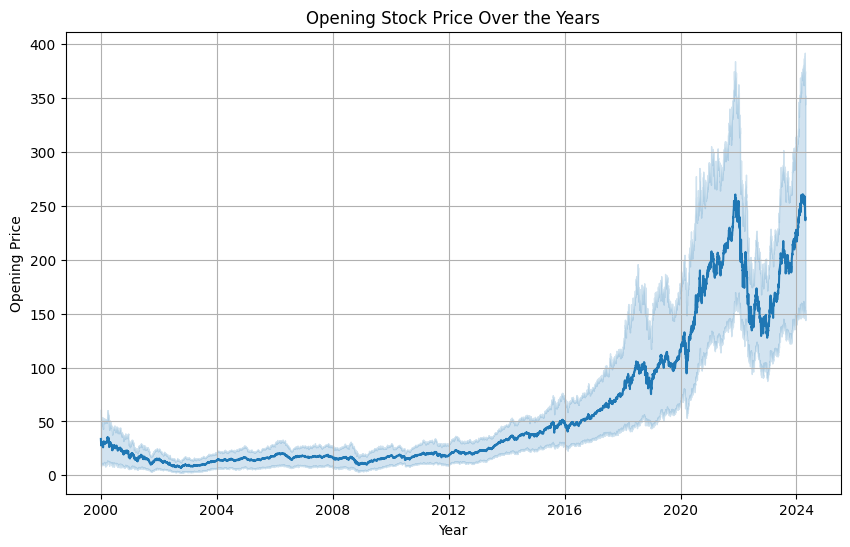

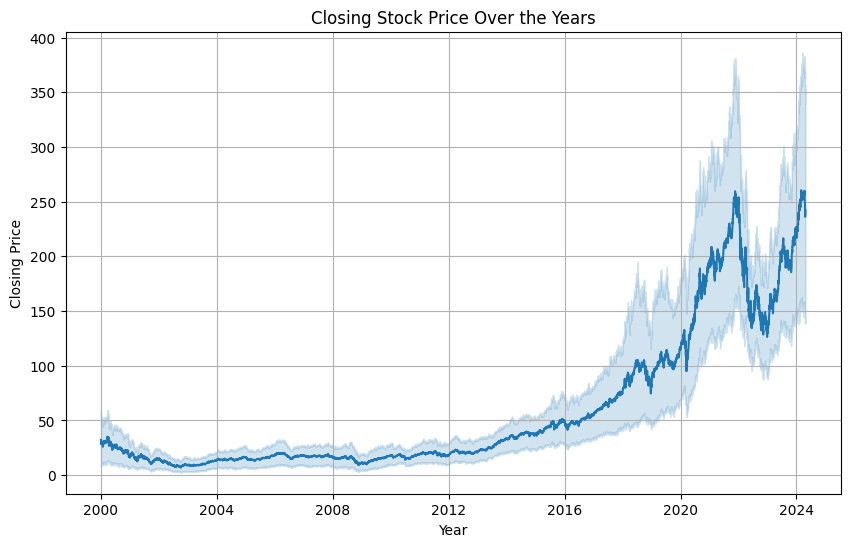

In [14]:

# Plot opening stock price over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Open', data=combined_data_df)
plt.title('Opening Stock Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Opening Price')
plt.grid(True)
plt.show()

# Plot closing stock price over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=combined_data_df)
plt.title('Closing Stock Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


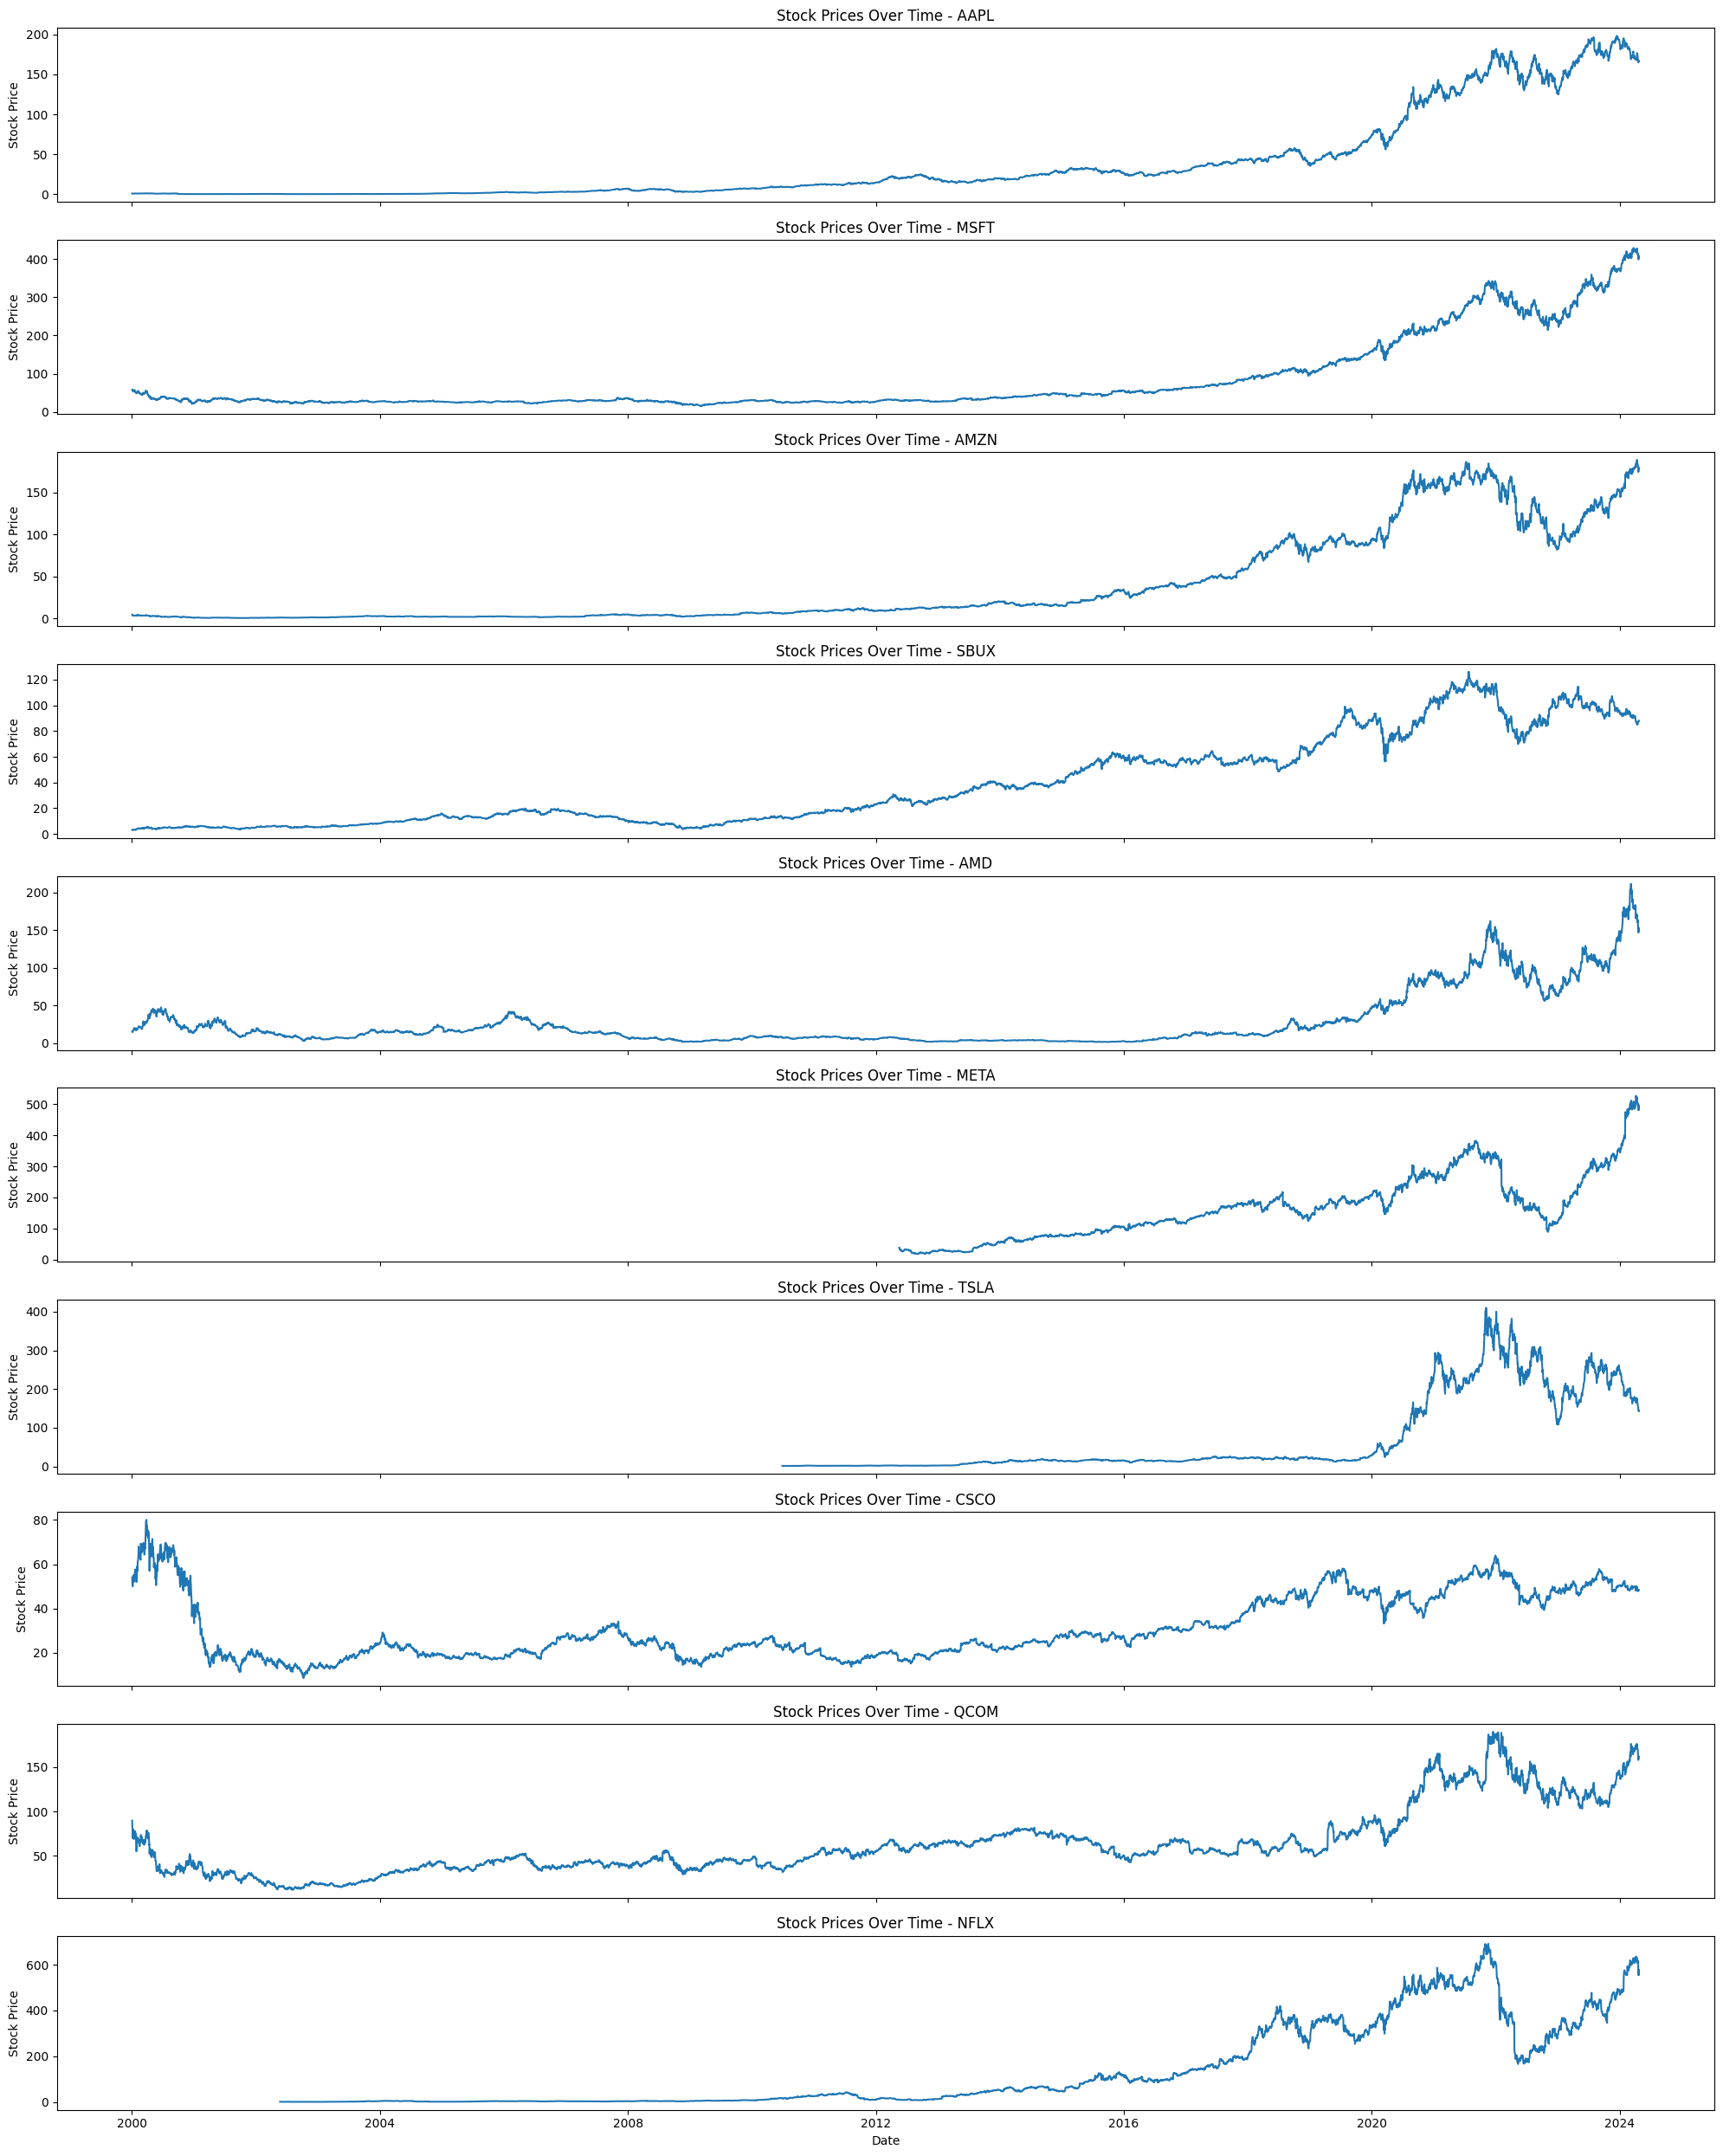

In [15]:
# Get unique companies from the 'Ticker' column
unique_companies = combined_data_df['Ticker'].unique()

# Create subplots for each company
fig, axs = plt.subplots(len(unique_companies), figsize=(20, 25), sharex=True)

# Plot stock prices for each company
for i, company in enumerate(unique_companies):
    company_data = combined_data_df[combined_data_df['Ticker'] == company]
    
    # Plot stock prices
    axs[i].plot(company_data['Date'], company_data['Close'])
    axs[i].set_ylabel('Stock Price')
    axs[i].set_title(f'Stock Prices Over Time - {company}')

# Set common x-label
plt.xlabel('Date')
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



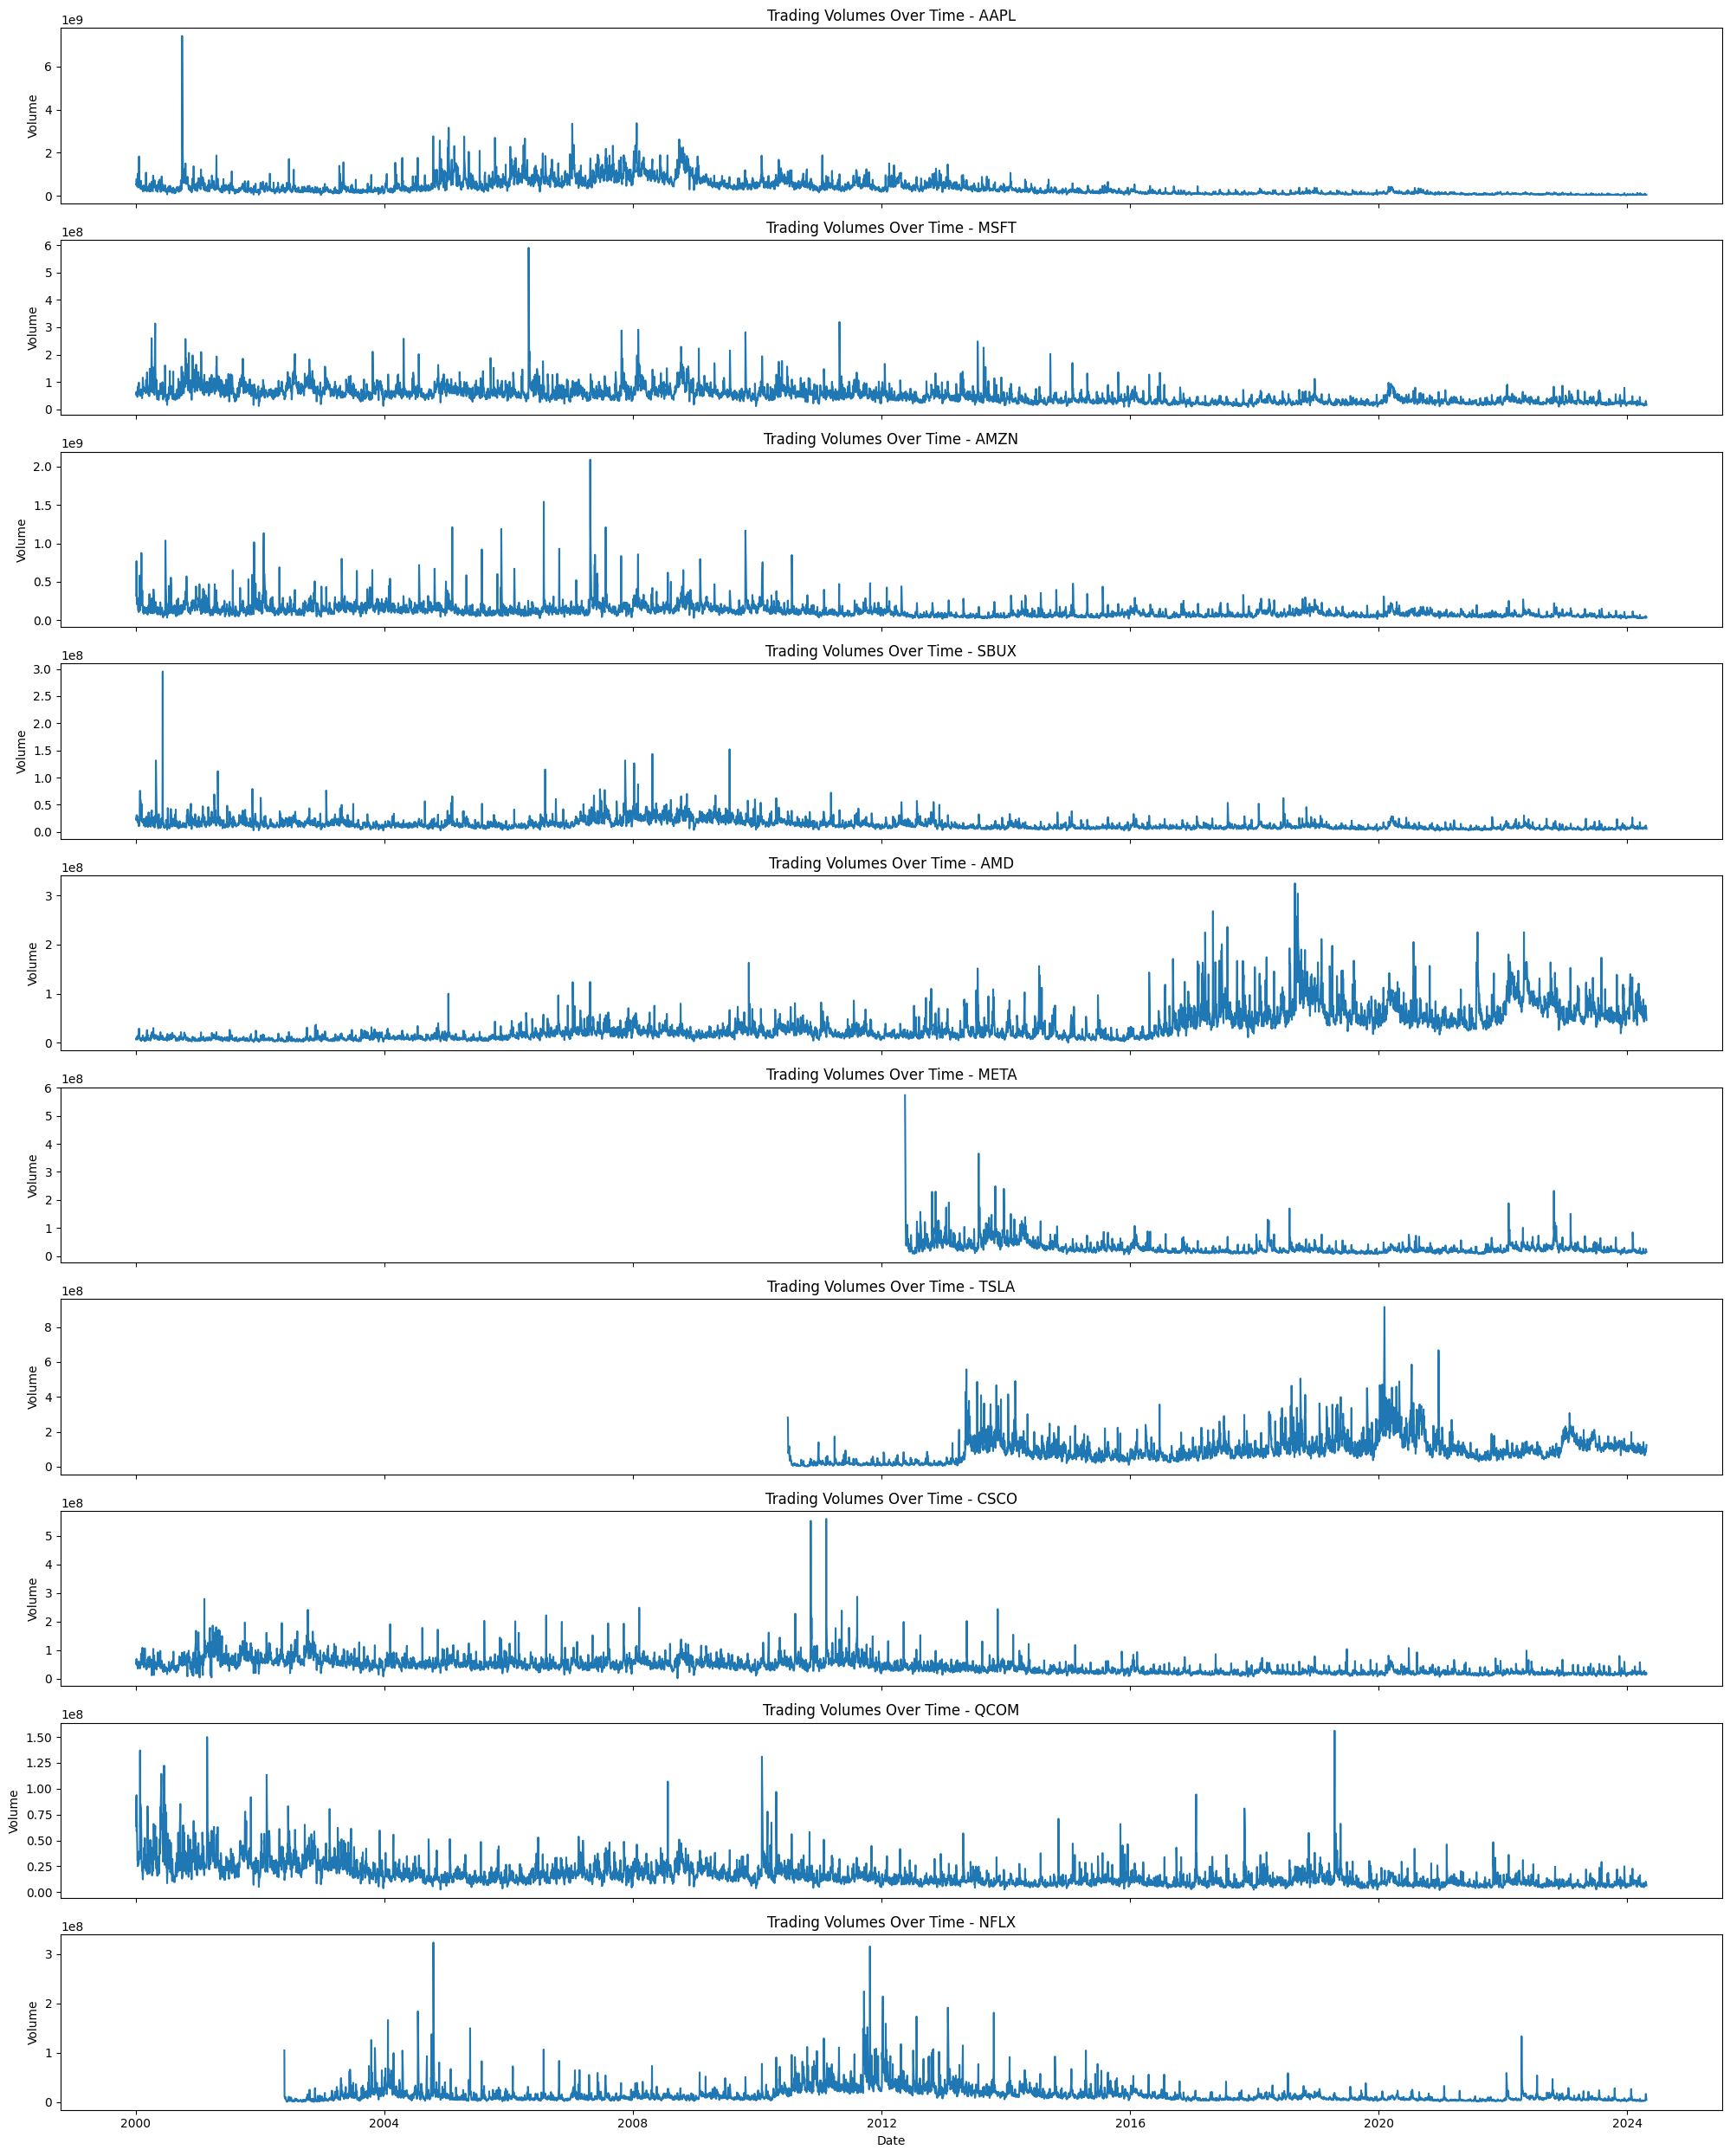

In [16]:
# Get unique companies from the 'Ticker' column
unique_companies = combined_data_df['Ticker'].unique()

# Create subplots for each company
fig, axs = plt.subplots(len(unique_companies), figsize=(20, 25), sharex=True)

# Plot trading volumes for each company
for i, company in enumerate(unique_companies):
    company_data = combined_data_df[combined_data_df['Ticker'] == company]
    
    # Plot trading volumes
    axs[i].plot(company_data['Date'], company_data['Volume'])
    axs[i].set_ylabel('Volume')
    axs[i].set_title(f'Trading Volumes Over Time - {company}')

# Set common x-label
plt.xlabel('Date')
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



### FINDINGS

### 2.2 Bivariate Analysis

### Checking for correlations between stock prices and trading volumes

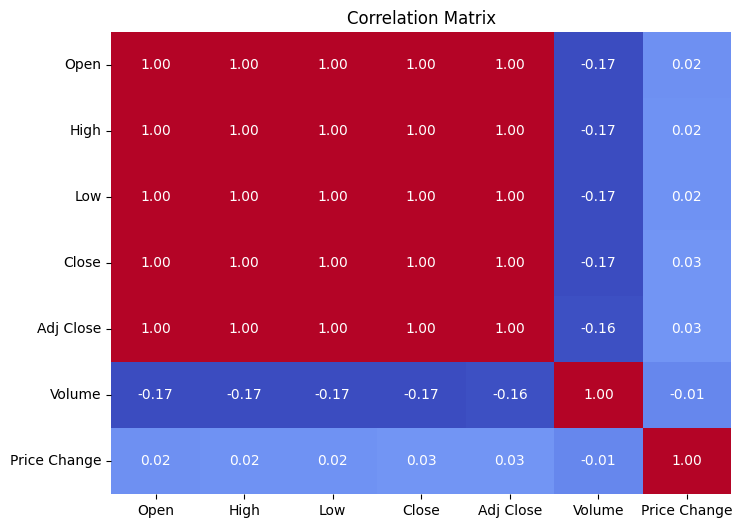

In [17]:


# Select numeric columns
numeric_columns = combined_data_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = combined_data_df[numeric_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Matrix')
plt.show()


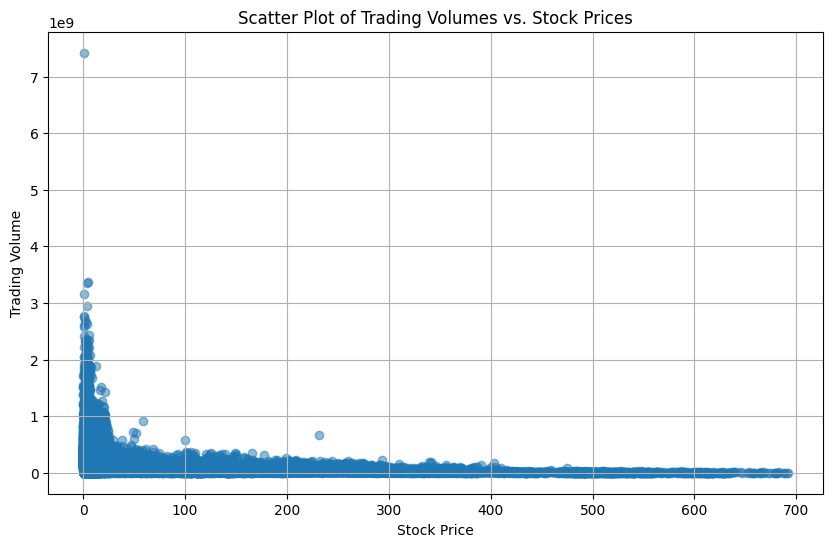

In [18]:
# Plot scatter plot of trading volumes against stock prices
plt.figure(figsize=(10, 6))
plt.scatter(combined_data_df['Close'], combined_data_df['Volume'], alpha=0.5)
plt.title('Scatter Plot of Trading Volumes vs. Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Trading Volume')
plt.grid(True)
plt.show()


#### Exploring  the distribution of stock prices and trading volumes for each company.

####  KDE Plots

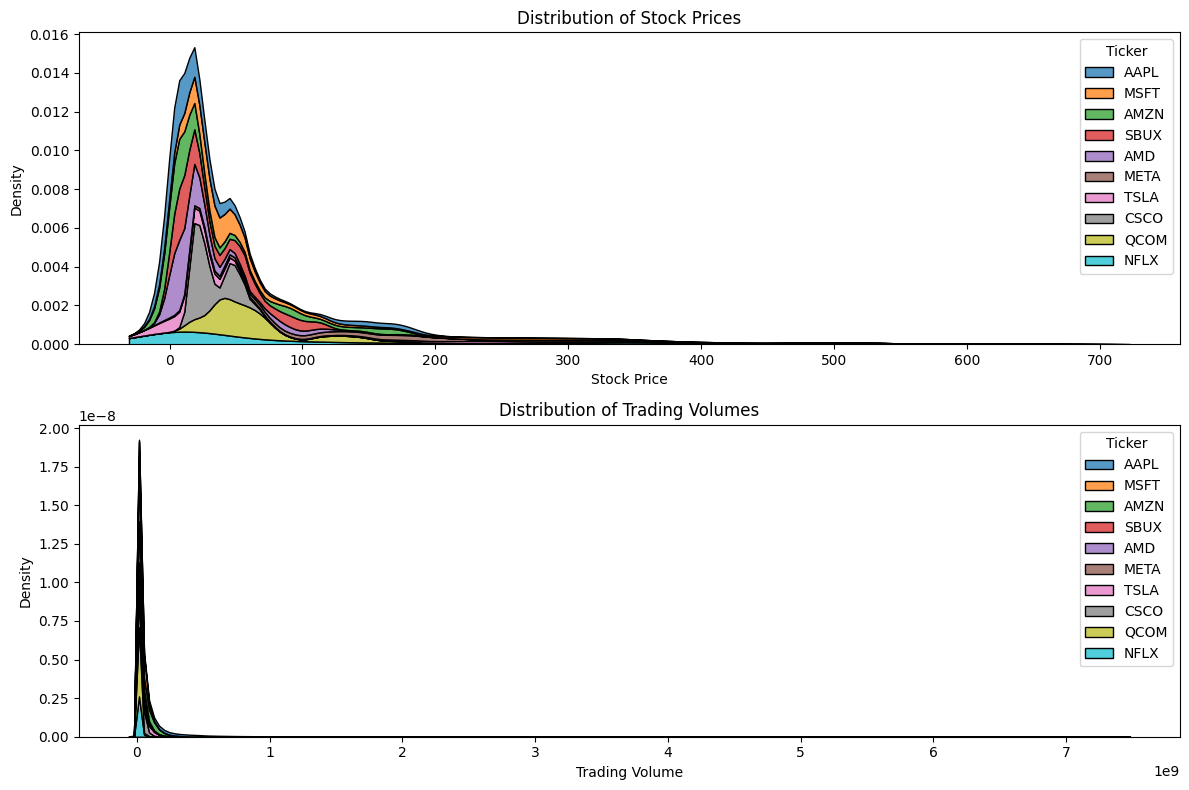

In [19]:
# Create separate subplots for stock prices and trading volumes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# KDE plot of stock prices
sns.kdeplot(data=combined_data_df, x='Close', hue='Ticker', multiple="stack", ax=axes[0], fill=True)
axes[0].set_title('Distribution of Stock Prices')
axes[0].set_xlabel('Stock Price')
axes[0].set_ylabel('Density')

# KDE plot of trading volumes
sns.kdeplot(data=combined_data_df, x='Volume', hue='Ticker', multiple="stack", ax=axes[1], fill=True)
axes[1].set_title('Distribution of Trading Volumes')
axes[1].set_xlabel('Trading Volume')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


### FINDINGS

### 2.3 Multivariate Analysis

### Investigating trends over time for individual companies and across the entire dataset.

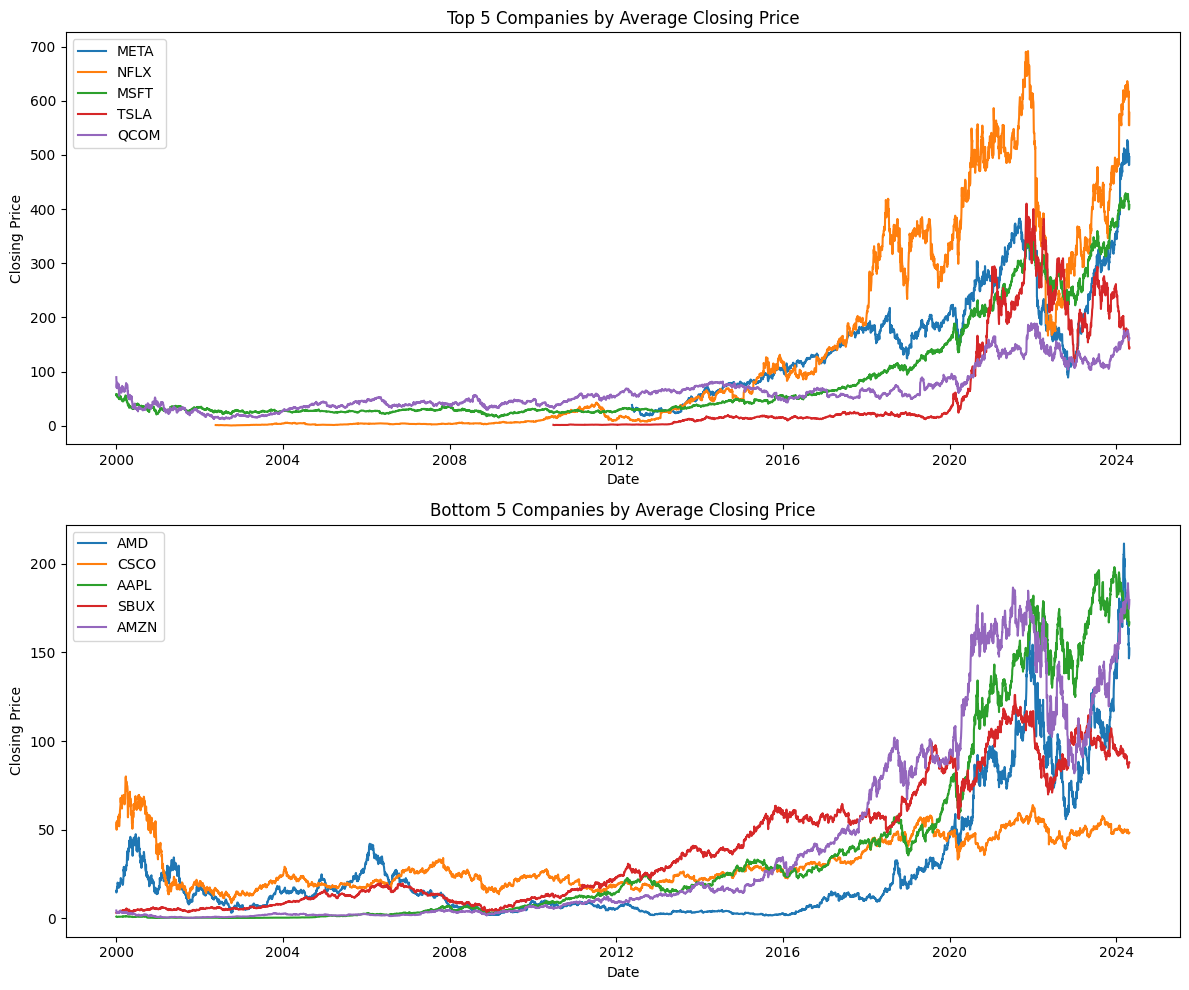

In [20]:


# Calculate average closing price for each company
average_prices = combined_data_df.groupby('Ticker')['Close'].mean()

# Select top 5 and bottom 5 companies based on average closing price
top_5_prices = average_prices.nlargest(5)
bottom_5_prices = average_prices.nsmallest(5)

# Create separate subplots for top and bottom companies
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot trends for top 5 companies based on average closing price
for company in top_5_prices.index:
    data = combined_data_df[combined_data_df['Ticker'] == company]
    axes[0].plot(data['Date'], data['Close'], label=company)

axes[0].set_title('Top 5 Companies by Average Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].legend()

# Plot trends for bottom 5 companies based on average closing price
for company in bottom_5_prices.index:
    data = combined_data_df[combined_data_df['Ticker'] == company]
    axes[1].plot(data['Date'], data['Close'], label=company)

axes[1].set_title('Bottom 5 Companies by Average Closing Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].legend()

plt.tight_layout()
plt.show()


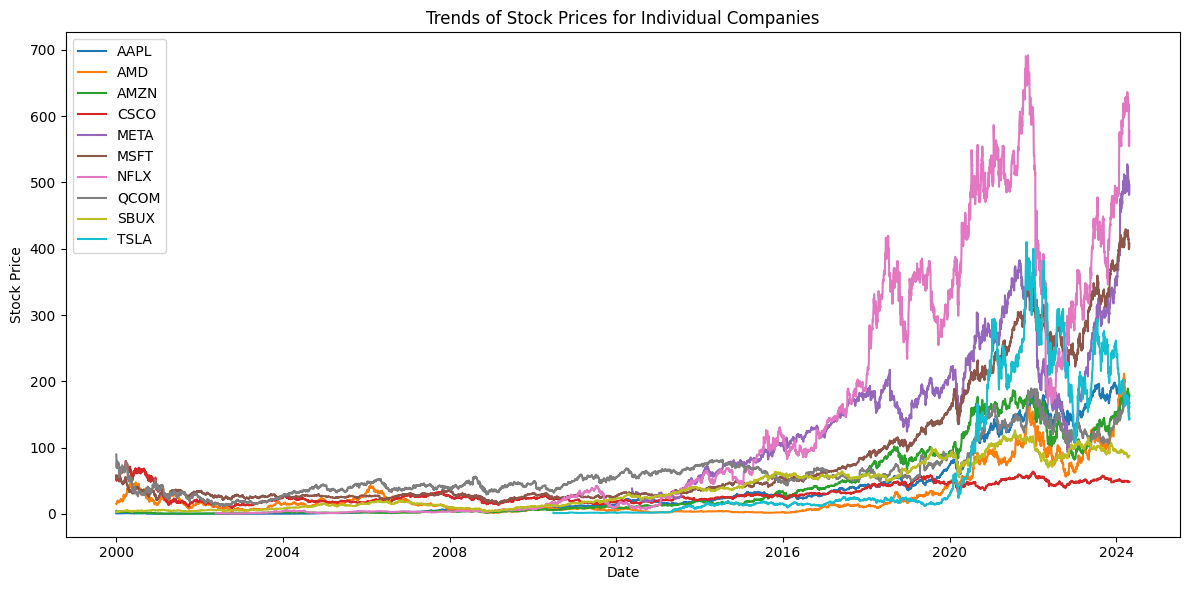

In [21]:
# Create separate subplot for stock prices
fig, ax = plt.subplots(figsize=(12, 6))

# Plot trends for each individual company (stock prices)
for company, data in combined_data_df.groupby('Ticker'):
    ax.plot(data['Date'], data['Close'], label=company)

ax.set_title('Trends of Stock Prices for Individual Companies')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend()

plt.tight_layout()
plt.show()


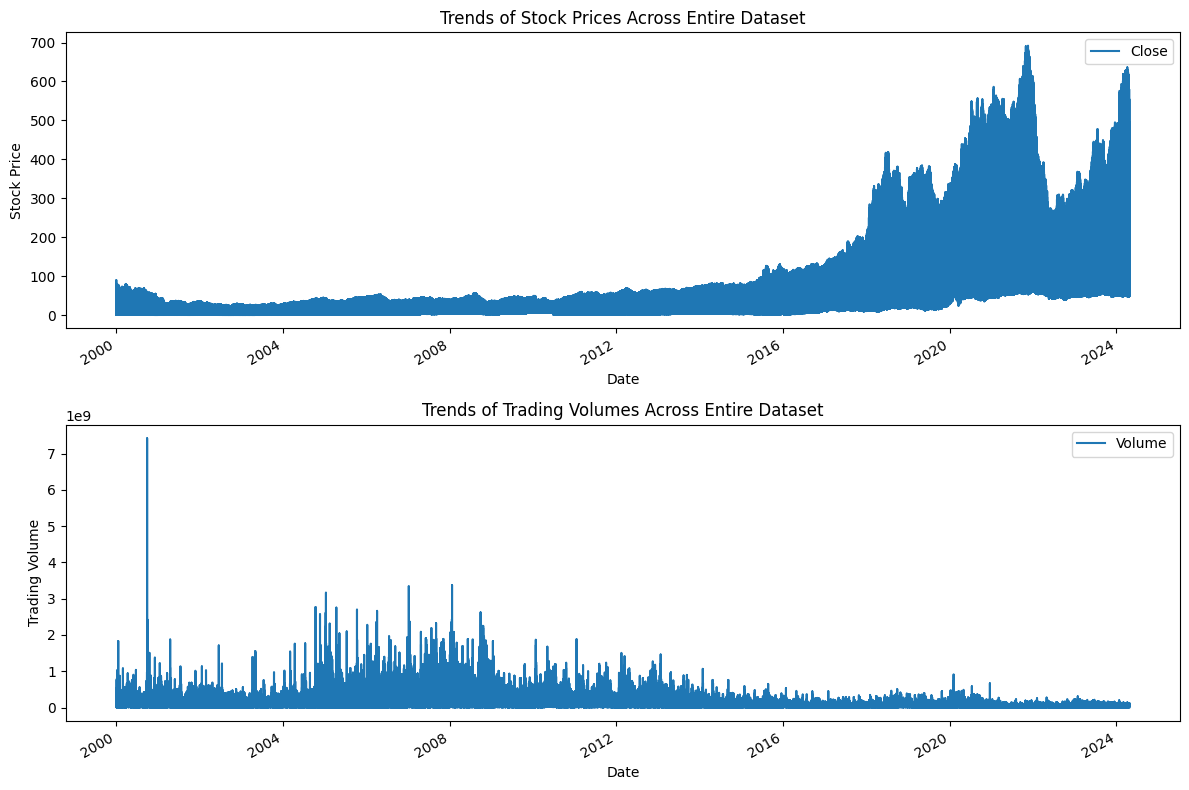

In [22]:
# Create separate subplots for stock prices and trading volumes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot trends for entire dataset (stock prices)
combined_data_df.plot(x='Date', y='Close', ax=axes[0])
axes[0].set_title('Trends of Stock Prices Across Entire Dataset')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Stock Price')

# Plot trends for entire dataset (trading volumes)
combined_data_df.plot(x='Date', y='Volume', ax=axes[1])
axes[1].set_title('Trends of Trading Volumes Across Entire Dataset')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trading Volume')

plt.tight_layout()
plt.show()


In [23]:
# Calculate cumulative percentage change for each company
price_growth_by_company = data.groupby('Ticker')['Close'].apply(lambda x: x.pct_change().sum())

# Identify top-performing companies based on stock price growth
top_performers_price_growth = price_growth_by_company.nlargest(5)

# Identify top-performing companies based on trading volumes
top_performers_volume = data.groupby('Ticker')['Volume'].sum().nlargest(5)

print("Top Performing Companies based on Stock Price Growth:\n", top_performers_price_growth)
print("\nTop Performing Companies based on Trading Volumes:\n", top_performers_volume)


Top Performing Companies based on Stock Price Growth:
 Ticker
TSLA    6.72055
Name: Close, dtype: float64

Top Performing Companies based on Trading Volumes:
 Ticker
TSLA    337112476700
Name: Volume, dtype: int64


### FINDINGS

#  DATA PREPROCESSING

## i)Feature Engineering

a)Moving averages

In [24]:
# Calculate moving averages
def calculate_moving_average(df, window, min_periods=1):
    return df['Close'].rolling(window=window, min_periods=min_periods).mean()

# Calculate 30-day moving average with min_periods=1
combined_data_df['100_day_MA'] = calculate_moving_average(combined_data_df, window=100, min_periods=1)



In [25]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960


b)Price Volatility Measures:

In [26]:
# Calculate standard deviation
combined_data_df['Price_Std'] = combined_data_df['Close'].rolling(window=100, min_periods=1).std()



In [27]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA,Price_Std
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853


c)Relative Strength Index(RSI)

In [28]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Apply the alternative RSI calculation
combined_data_df['RSI'] = calculate_rsi(combined_data_df)


In [29]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA,Price_Std,RSI
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,0.000000
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,13.713563
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,7.523074
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,24.552339


d)Price Momentum Indicators:

In [30]:
# Calculate MACD
short_window = 12
long_window = 26
combined_data_df['MACD'] = combined_data_df['Close'].ewm(span=short_window).mean() - combined_data_df['Close'].ewm(span=long_window).mean()


In [31]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA,Price_Std,RSI,MACD
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,0.000000,-0.001891
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,13.713563,-0.001994
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,7.523074,-0.004893
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,24.552339,-0.004767


e)Price Oscillators

In [32]:
def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window, min_periods=1).min()
    high_max = data['High'].rolling(window=window, min_periods=1).max()
    return (data['Close'] - low_min) / (high_max - low_min) * 100

combined_data_df['Stochastic_Oscillator'] = calculate_stochastic_oscillator(combined_data_df)


In [33]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA,Price_Std,RSI,MACD,Stochastic_Oscillator
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000,94.797962
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,0.000000,-0.001891,11.602499
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,13.713563,-0.001994,24.861351
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,7.523074,-0.004893,0.000000
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,24.552339,-0.004767,25.714559


f)Volume based Indicators

In [34]:
# Calculate volume moving averages
combined_data_df['100_day_volume_MA'] = combined_data_df['Volume'].rolling(window=100, min_periods=1).mean()


In [35]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA,Price_Std,RSI,MACD,Stochastic_Oscillator,100_day_volume_MA
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000,94.797962,535796800.0
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,0.000000,-0.001891,11.602499,524087200.0
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,13.713563,-0.001994,24.861351,608832000.0
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,7.523074,-0.004893,0.000000,648617200.0
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,24.552339,-0.004767,25.714559,611040640.0


g)Bollinger bands

In [36]:
# Calculate Bollinger Bands
window = 100
combined_data_df['Rolling_mean'] = combined_data_df['Close'].rolling(window=window, min_periods=1).mean()
combined_data_df['Rolling_std'] = combined_data_df['Close'].rolling(window=window, min_periods=1).std()
combined_data_df['Upper_band'] = combined_data_df['Rolling_mean'] + 2 * combined_data_df['Rolling_std']
combined_data_df['Lower_band'] = combined_data_df['Rolling_mean'] - 2 * combined_data_df['Rolling_std']


In [37]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,100_day_MA,Price_Std,RSI,MACD,Stochastic_Oscillator,100_day_volume_MA,Rolling_mean,Rolling_std,Upper_band,Lower_band
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000,94.797962,535796800.0,0.999442,NaN,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,0.000000,-0.001891,11.602499,524087200.0,0.957310,0.059583,1.076476,0.838145
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,13.713563,-0.001994,24.861351,608832000.0,0.947731,0.045281,1.038293,0.857168
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,7.523074,-0.004893,0.000000,648617200.0,0.922851,0.061990,1.046832,0.798871
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,24.552339,-0.004767,25.714559,611040640.0,0.915960,0.055853,1.027666,0.804253


h)Fundamental Ratios

i)Lagged Variables

In [38]:
# Create lagged variables
combined_data_df['CloseLagged_1'] = combined_data_df['Close'].shift(1)


In [39]:
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,...,Price_Std,RSI,MACD,Stochastic_Oscillator,100_day_volume_MA,Rolling_mean,Rolling_std,Upper_band,Lower_band,CloseLagged_1
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,...,NaN,NaN,0.000000,94.797962,535796800.0,0.999442,NaN,NaN,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,...,0.059583,0.000000,-0.001891,11.602499,524087200.0,0.957310,0.059583,1.076476,0.838145,0.999442
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,...,0.045281,13.713563,-0.001994,24.861351,608832000.0,0.947731,0.045281,1.038293,0.857168,0.915179
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,...,0.061990,7.523074,-0.004893,0.000000,648617200.0,0.922851,0.061990,1.046832,0.798871,0.928571
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,...,0.055853,24.552339,-0.004767,25.714559,611040640.0,0.915960,0.055853,1.027666,0.804253,0.848214


In [40]:
# Replace NaN values with 0
combined_data_df = combined_data_df.fillna(0)

# Check if there are any NaN values remaining
print(combined_data.isnull().sum())

# Check the first few rows of the DataFrame to verify the replacement
combined_data_df.head(3)


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,...,Price_Std,RSI,MACD,Stochastic_Oscillator,100_day_volume_MA,Rolling_mean,Rolling_std,Upper_band,Lower_band,CloseLagged_1
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,0.000000,No Change,...,0.000000,0.000000,0.000000,94.797962,535796800.0,0.999442,0.000000,0.000000,0.000000,0.000000
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,...,0.059583,0.000000,-0.001891,11.602499,524087200.0,0.957310,0.059583,1.076476,0.838145,0.999442
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,...,0.045281,13.713563,-0.001994,24.861351,608832000.0,0.947731,0.045281,1.038293,0.857168,0.915179


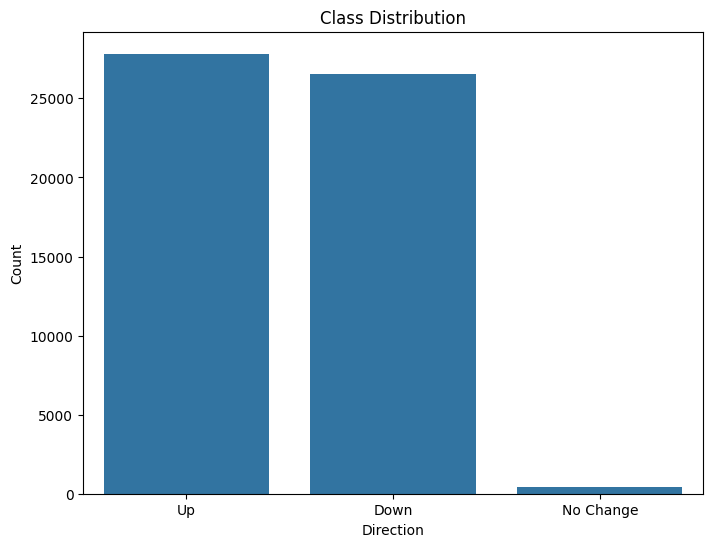

In [41]:
# Count the occurrences of each class
class_counts = combined_data_df['Direction'].value_counts()

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.show()

In [42]:
from sklearn.utils import resample

# Separate majority and minority classes
df_up = combined_data_df[combined_data_df['Direction'] == 'Up']
df_down = combined_data_df[combined_data_df['Direction'] == 'Down']
df_no_change = combined_data_df[combined_data_df['Direction'] == 'No Change']

# Upsample minority classes
df_down_resampled = resample(df_down, replace=True, n_samples=len(df_up), random_state=42)
df_no_change_resampled = resample(df_no_change, replace=True, n_samples=len(df_up), random_state=42)

# Combine majority class with upsampled minority classes
combined_data_resampled = pd.concat([df_up, df_down_resampled, df_no_change_resampled])

# Display the new class distribution
class_counts_resampled = combined_data_resampled['Direction'].value_counts()
print(class_counts_resampled)


Direction
Up           27823
Down         27823
No Change    27823
Name: count, dtype: int64


## ii)Scaling

Identifying Columns: It separates your dataset into two types of columns: categorical (like types of tickers) and numerical (like stock prices).
Defining Preprocessing Steps: It sets up a plan for how to transform each type of column. For numerical columns, it will scale them (make sure they all have a similar range of values). For categorical columns, it will use one-hot encoding (convert each category into a binary vector).
Creating a Preprocessing Pipeline: It combines these steps into a pipeline, like a recipe for transforming your data. This pipeline will first scale the numerical columns and then perform one-hot encoding on the categorical columns.
Applying the Pipeline: Finally, it applies this pipeline to your dataset, transforming the data accordingly. The result is a processed dataset that's ready to be fed into machine learning models.


In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns to be encoded and scaled
categorical_cols = ['Ticker']
numerical_cols = combined_data_resampled.drop(['Ticker', 'Date', 'Price Change', 'Direction'], axis=1).columns

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Append scaling step to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing pipeline to data
processed_data = pipeline.fit_transform(combined_data_resampled)


In [44]:
from sklearn.model_selection import train_test_split

# Define the target variable (assuming it's 'Direction')
target = combined_data_resampled['Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_data, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (66775, 27)
y_train shape: (66775,)
X_test shape: (16694, 27)
y_test shape: (16694,)


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8323349706481371

Classification Report:
              precision    recall  f1-score   support

        Down       0.74      0.80      0.77      5631
   No Change       0.98      1.00      0.99      5591
          Up       0.77      0.70      0.73      5472

    accuracy                           0.83     16694
   macro avg       0.83      0.83      0.83     16694
weighted avg       0.83      0.83      0.83     16694



In [46]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8700131783874446

Classification Report:
              precision    recall  f1-score   support

        Down       0.79      0.84      0.81      5631
   No Change       0.99      1.00      1.00      5591
          Up       0.82      0.77      0.80      5472

    accuracy                           0.87     16694
   macro avg       0.87      0.87      0.87     16694
weighted avg       0.87      0.87      0.87     16694



## **Hyperparameter tuning using grid search with cross-validation**

In [63]:
from sklearn.model_selection import GridSearchCV
# Define pipelines for Decision Tree and Random Forest classifiers
pipelines = {
    'Tuned_DecisionTree': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'Tuned_RandomForest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
}

# Define hyperparameters for Decision Tree and Random Forest classifiers
parameters = {
    'Tuned_DecisionTree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Tuned_RandomForest': {
        'classifier__n_estimators': [10, 20, 30],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

# Perform grid search with cross-validation for Decision Tree and Random Forest classifiers
for algo in pipelines:
    grid_search = GridSearchCV(pipelines[algo], parameters[algo], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {algo}:")
    print(grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
  # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    

    
    
  

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Tuned_DecisionTree:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Best score: 0.8189741669786595
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Tuned_RandomForest:
{'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 30}
Best score: 0.8453013852489704


In [64]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
  # Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8640829040373788

Classification Report:
              precision    recall  f1-score   support

        Down       0.78      0.83      0.81      5631
   No Change       0.99      1.00      1.00      5591
          Up       0.82      0.76      0.79      5472

    accuracy                           0.86     16694
   macro avg       0.86      0.86      0.86     16694
weighted avg       0.86      0.86      0.86     16694



In [66]:
import pickle
# Pickle the best model
with open('../backend/modelpickle/tuned_RandomForest.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Tuned Random Forest model pickled successfully!")

Tuned Random Forest model pickled successfully!


## **Model Testing**

In [72]:
new_data = pd.read_csv('../backend/data/data.csv')
new_data.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [73]:
# Assuming your DataFrame is named df
new_data  = new_data .rename(columns={'Close/Last': 'Close'})
new_data.head(2)

,Company,Date,Close,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63


In [76]:
print(new_data.columns)


Index(['Company', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [77]:
# Define function to clean and convert data
def clean_and_convert_data(data):
    # Remove dollar signs and commas from numeric columns and convert them to numeric
    numeric_cols = ['Close', 'Volume', 'Open', 'High', 'Low']
    data[numeric_cols] = data[numeric_cols].replace('[\$,]', '', regex=True).astype(float)
    
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    
    return data

# Define function to calculate price change and direction
def calculate_price_change_and_direction(data):
    """Calculate price change and determine the direction."""
    data['Price Change'] = data['Close'].diff()
    data['Direction'] = data['Price Change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

# Define function to apply feature engineering
def apply_feature_engineering(data):
    """Apply feature engineering steps to the data."""
    #You need to define the missing functions here or import them from another module
    data = calculate_moving_average(data, window=10)
    data = calculate_rsi(data, window=14)
    data = calculate_stochastic_oscillator(data, window=14)
    data = calculate_lagged_variables(data, lag=1)
    data = calculate_bollinger_bands(data, window=100)
    data = calculate_macd(data, short_window=12, long_window=26)
    return data

# Define function to preprocess the data
def preprocess_data(data):
    """Preprocess the data for model prediction."""
    categorical_cols = ['Ticker']  # Assuming 'Ticker' is categorical
    numerical_cols = data.drop(['Ticker', 'Date', 'Price Change', 'Direction'], axis=1).columns  # Assuming 'Date' is not needed for prediction
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])
    processed_data = preprocessor.fit_transform(data)
    return processed_data

# Define function to load the trained model and make predictions
def load_model_and_predict(data, model_path):
    """Load the trained model and make predictions."""
    with open(model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    predictions = loaded_model.predict(data)
    return predictions

# Clean and convert the data
new_data = clean_and_convert_data(new_data)

# Apply feature engineering
new_data = apply_feature_engineering(new_data)

# Preprocess the data
processed_new_data = preprocess_data(new_data)

# Load the trained model and make predictions
model_path = '../backend/modelpickle/tuned_RandomForest.pkl'
predictions = load_model_and_predict(processed_new_data, model_path)

# Print or save the predictions
print(predictions)

KeyError: 'Close'

In [70]:
def clean_and_convert_data(data):
    # Remove dollar signs and commas from numeric columns and convert them to numeric
    numeric_cols = ['Close/Last', 'Volume', 'Open', 'High', 'Low']
    data[numeric_cols] = data[numeric_cols].replace('[\$,]', '', regex=True).astype(float)
    
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    
    return data
def calculate_price_change_and_direction(data):
    """Calculate price change and determine the direction."""
    data['Price Change'] = data['Close'].diff()
    data['Direction'] = data['Price Change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

# Now let's include this function in the code:
def apply_feature_engineering(data):
    """Apply feature engineering steps to the data."""
    calculate_price_change_and_direction(data)
    data = calculate_moving_average(data, window=10)
    data = calculate_rsi(data, window=14)
    data = calculate_stochastic_oscillator(data, window=14)
    data = calculate_lagged_variables(data, lag=1)
    data = calculate_bollinger_bands(data, window=100)
    data = calculate_macd(data, short_window=12, long_window=26)
    return data

def preprocess_data(data):
    """Preprocess the data for model prediction."""
    categorical_cols = ['Ticker']  # Assuming 'Ticker' is categorical
    numerical_cols = data.drop(['Ticker', 'Date', 'Price Change', 'Direction'], axis=1).columns  # Assuming 'Date' is not needed for prediction
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])
    processed_data = preprocessor.fit_transform(data)
    return processed_data

def load_model_and_predict(data, model_path):
    """Load the trained model and make predictions."""
    with open(model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    predictions = loaded_model.predict(data)
    return predictions

# Apply feature engineering
new_data = apply_feature_engineering(new_data)

# Preprocess the data
processed_new_data = preprocess_data(new_data)

# Load the trained model and make predictions
model_path = '../backend/modelpickle/tuned_RandomForest.pkl'
predictions = load_model_and_predict(processed_new_data, model_path)

# Print or save the predictions
print(predictions)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Apply the same preprocessing steps to the new data
# Feature engineering
def calculate_price_change_and_direction(new_data):
    # Calculate the price change
    new_data['Price Change'] = new_data['Close'].diff()

    # Determine if the stock went up, down, or had no change
    new_data['Direction'] = new_data['Price Change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')
    

new_data['Moving_Average'] = calculate_moving_average(new_data, window=10)
new_data['RSI'] = calculate_rsi(new_data, window=14)
new_data['Stochastic_Oscillator'] = calculate_stochastic_oscillator(new_data, window=14)


def calculate_lagged_variables(new_data, lag=1):
    new_data['CloseLagged_' + str(lag)] = new_data['Close'].shift(lag)
    return new_data

def calculate_bollinger_bands(new_data, window=100):
    new_data['Rolling_mean'] = new_data['Close'].rolling(window=window, min_periods=1).mean()
    new_data['Rolling_std'] = new_data['Close'].rolling(window=window, min_periods=1).std()
    new_data['Upper_band'] = new_data['Rolling_mean'] + 2 * new_data['Rolling_std']
    new_data['Lower_band'] = new_data['Rolling_mean'] - 2 * new_data['Rolling_std']
    return new_data

def calculate_macd(new_data, short_window=12, long_window=26):
    new_data['MACD'] = new_data['Close'].ewm(span=short_window).mean() - new_data['Close'].ewm(span=long_window).mean()
    return new_data

# Define columns to be encoded and scaled
categorical_cols = ['Ticker']  # Assuming 'Ticker' is categorical
numerical_cols = new_data.drop(['Ticker', 'Date', 'Price Change', 'Direction'], axis=1).columns  # Assuming 'Date' is not needed for prediction

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing pipeline to new data
processed_new_data = preprocessor.transform(new_data)

# Load the trained model
with open('../backend/modelpickle/tuned_RandomForest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# Make predictions on the new data
predictions = best_model.predict(processed_new_data)

# Print or save the predictions
print(predictions)

## EVALUATION

**Performance Metrics:**

Calculate evaluation metrics to assess the performance of the portfolio recommendation system. Common metrics include:
Accuracy: Percentage of correct predictions.
Precision: Proportion of true positive predictions among all positive predictions.
Recall: Proportion of true positive predictions among all actual positives.
F1-score: Harmonic mean of precision and recall.
AUC-ROC: Area under the receiver operating characteristic curve.

**Backtesting:**

Conduct backtesting to assess the historical performance of the recommended portfolios. Simulate portfolio returns based on the recommendations and compare them with benchmark portfolios or market indices.


**Risk Analysis:**

Evaluate the risk associated with the recommended portfolios by analyzing metrics such as volatility, maximum drawdown, Sharpe ratio, or value at risk (VaR).

## CONCLUSION